In [48]:
import os 
path ="/Users/ambarruiz/Documents/"
os.chdir(path)
os.getcwd()

'/Users/ambarruiz/Documents'

In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [50]:
data = pd.read_csv('Nstocks.csv')
print(data.head())

         Date         Open         High          Low        Close  \
0  2017-06-01  2415.649902  2430.060059  2413.540039  2430.060059   
1  2017-06-02  2431.280029  2440.229980  2427.709961  2439.070068   
2  2017-06-05  2437.830078  2439.550049  2434.320068  2436.100098   
3  2017-06-06  2431.919922  2436.209961  2428.120117  2429.330078   
4  2017-06-07  2432.030029  2435.280029  2424.750000  2433.139893   

     Adj Close      Volume  
0  2430.060059  3857140000  
1  2439.070068  3461680000  
2  2436.100098  2912600000  
3  2429.330078  3357840000  
4  2433.139893  3572300000  


In [51]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)
# X is the input variable

X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]


# Y is the target or output variable

y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

In [52]:
# Total dataset length
dataset_length = data.shape[0]
# Training dataset length

split = int(dataset_length * 0.75)

split

185

In [53]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Print the size of the train and test dataset

print(X_train.shape, X_test.shape)

print(y_train.shape, y_test.shape)

(185, 4) (62, 4)
(185,) (62,)


In [54]:
clf = RandomForestClassifier(random_state=5)

In [55]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  46.774193548387096


In [57]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.46      0.39      0.42        31
           1       0.47      0.55      0.51        31

   micro avg       0.47      0.47      0.47        62
   macro avg       0.47      0.47      0.46        62
weighted avg       0.47      0.47      0.46        62



In [58]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

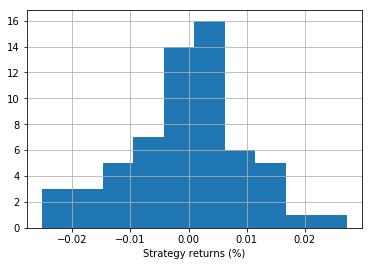

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()


#Output variable: If tomorrow’s close price is greater than today's close price then 
#the output variable is set to 1 and otherwise set to -1. 1 indicates to buy the stock
#and -1 indicates to sell the stock

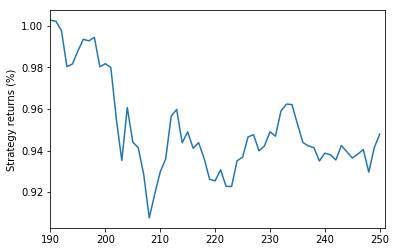

In [60]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

##The output displays the strategy returns and daily returns according to the code for 
#the Random Forest Classifier.